In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
#Reading the Data from the CSV file available in the datasets folder
train_data = pd.read_csv(r"../datasets/train.csv")
test_data = pd.read_csv(r"../datasets/test.csv")

In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [164]:
print("Test data shape : ",train_data.shape, "\nTrain data Shape : ", test_data.shape )

Test data shape :  (891, 12) 
Train data Shape :  (418, 11)


In [165]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train_data.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [166]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train_data.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [167]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train_data.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [168]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [169]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train_data.count()
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## Statistical analysis

In [170]:
# get discripte statistcs on "object" datatypes
train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [171]:
# get discripte statistcs on "non object" datatypes
train_data.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Carryout univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [172]:
train_data.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

## Univariate Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16976\833258124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train_data, palette='mako')


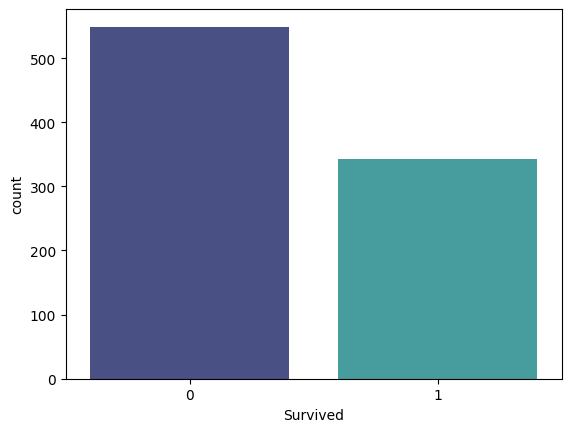

In [173]:
#fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot(x='Survived',data=train_data, palette='mako')
plt.show()


## Missing Values Test Data

Age         177
Cabin       687
Embarked      2
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16976\3077383419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empty_col,y=empty_col_count, palette='mako')


<Axes: ylabel='None'>

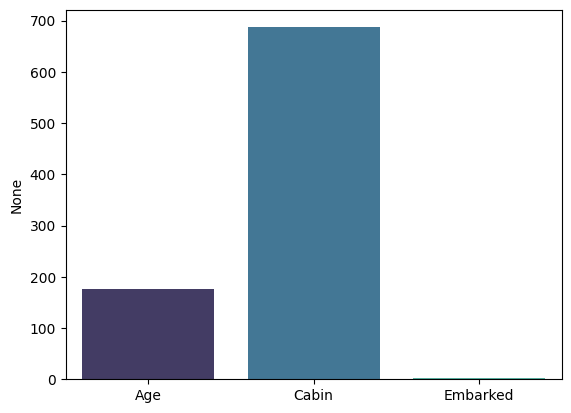

In [174]:
empty_col = train_data.columns[train_data.isna().any()].tolist()
empty_col_count = train_data[empty_col].isna().sum()
print(empty_col_count)
sns.barplot(x=empty_col,y=empty_col_count, palette='mako')

Age       86
Fare       1
Cabin    327
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16976\3115577359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empty_col_test,y=empty_col_count_test, palette='husl')


<Axes: ylabel='None'>

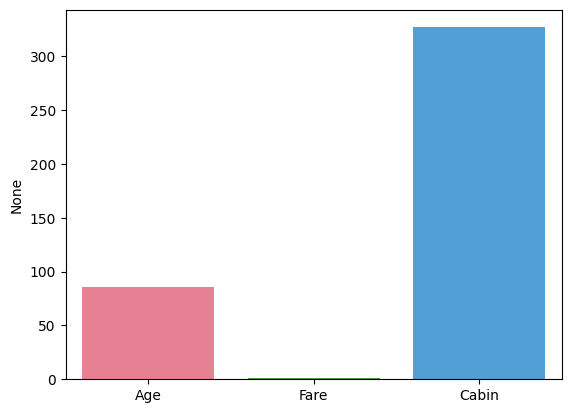

In [175]:
empty_col_test = test_data.columns[test_data.isna().any()].to_list()
empty_col_count_test = test_data[empty_col_test].isna().sum()
print(empty_col_count_test)
sns.barplot(x=empty_col_test,y=empty_col_count_test, palette='husl')

## Missing Value Treatment

In [176]:
for col in empty_col:
   if train_data[col].dtype == 'object':
      print("yes")
   else:
      train_data = train_data[col].fillna( train_data[col].mean(), inplace=True)
    

yes
yes


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16976\2471721675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna( train_data[col].mean(), inplace=True)


## Survival Rate based on each class

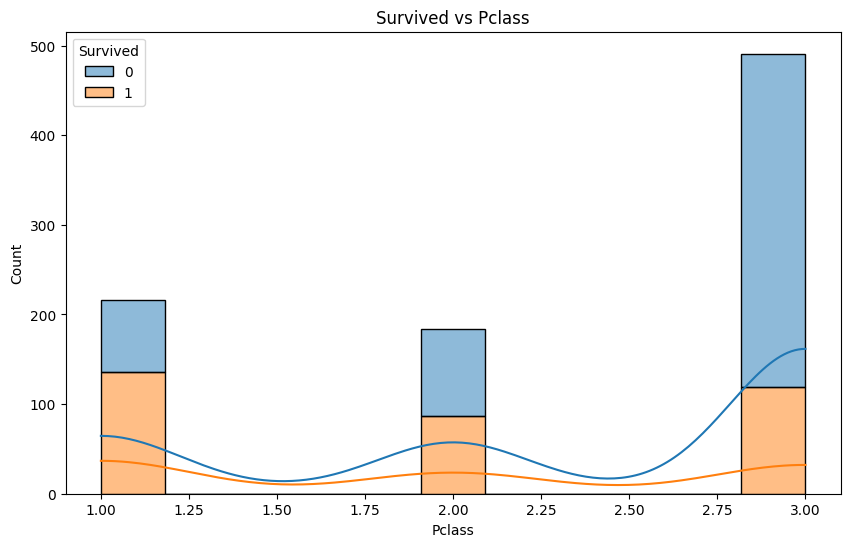

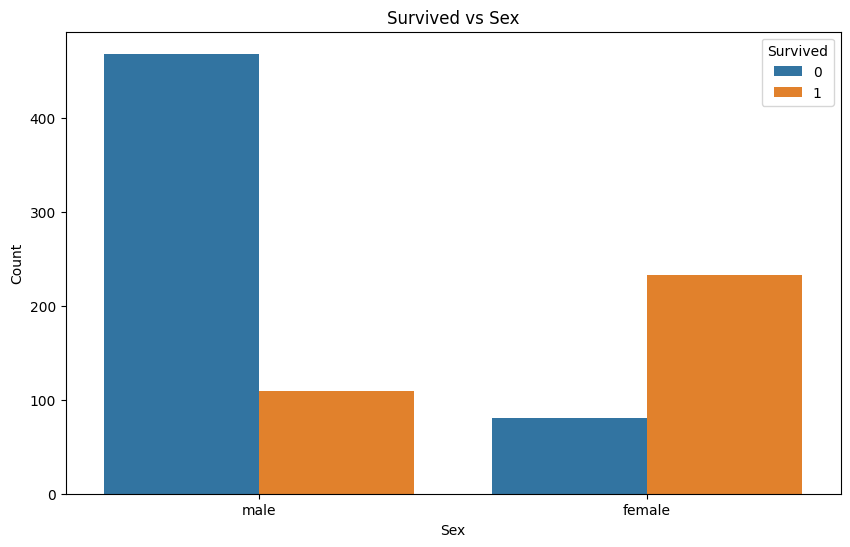

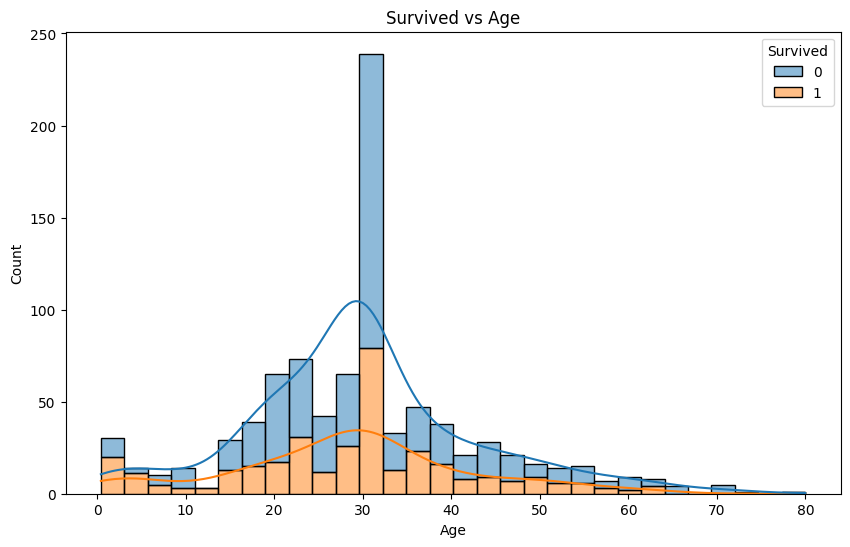

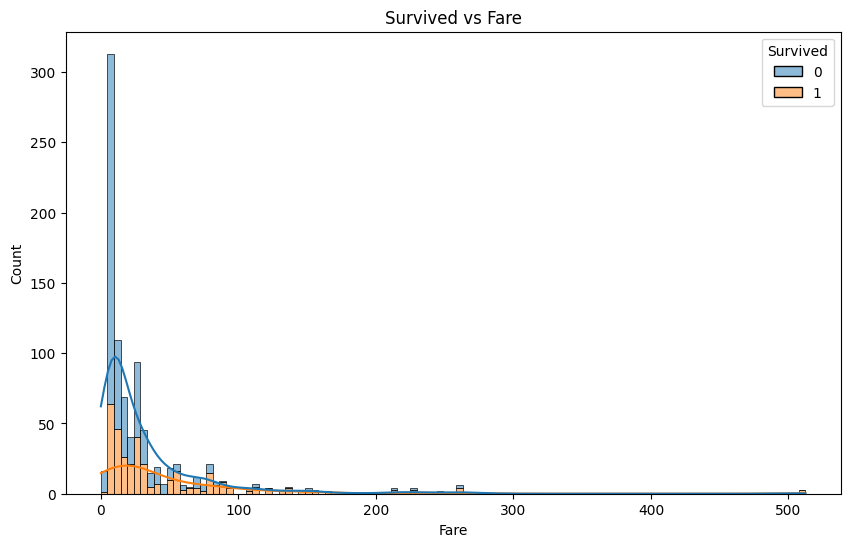

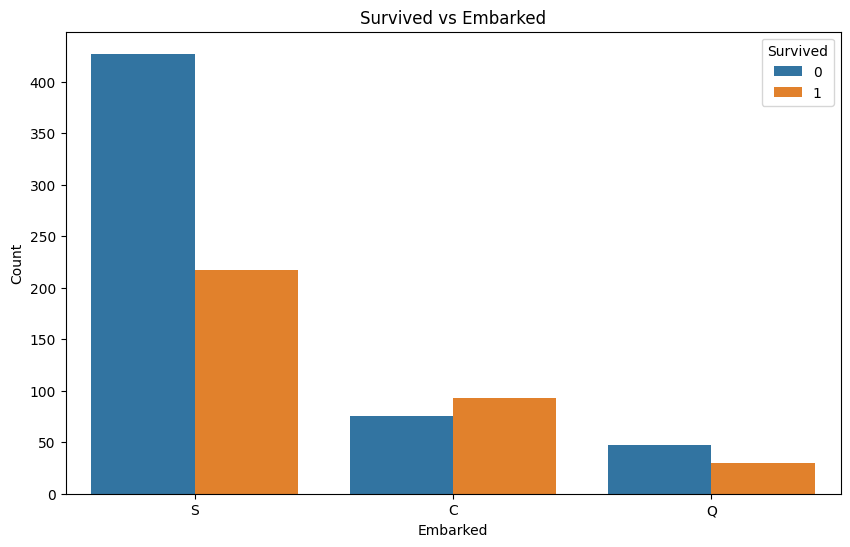

In [177]:
train_data1 = train_data[['Pclass','Sex','Age','Fare','Embarked','Survived']]
train_data1

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

for feature in features:
    plt.figure(figsize=(10, 6))
    if train_data1[feature].dtype == 'object':
        sns.countplot(x=feature, hue='Survived', data=train_data1)
    else:
        sns.histplot(data=train_data1, x=feature, hue='Survived', multiple="stack", kde=True)
    plt.title(f'Survived vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    plt.show()
